In [1]:
# Ecuaciones Diferenciales Parciales
# Elipticas. Método implícito
import numpy as np

In [2]:
# INGRESO
# Condiciones iniciales en los bordes
Ta = 60
Tb = 60
Tc = 50
Td = 70
# dimensiones de la placa
x0 = 0
xn = 2
y0 = 0
yn = 1.5
# discretiza, supone dx=dy
tramosx = 4
tramosy = 4
dx = (xn-x0)/tramosx 
dy = (yn-y0)/tramosy 
maxitera = 100
tolera = 0.0001

A = np.array([
    [-4, 1, 0, 1, 0, 0, 0, 0, 0],
    [ 1,-4, 1, 0, 1, 0, 0, 0, 0],
    [ 0, 1,-4, 0, 0, 1, 0, 0, 0],
    [ 1, 0, 0,-4, 1, 0, 1, 0, 0],
    [ 0, 1, 0, 1,-4, 1, 0, 1, 0],
    [ 0, 0, 1, 0, 1,-4, 0, 0, 1],
    [ 0, 0, 0, 1, 0, 0,-4, 1, 0],
    [ 0, 0, 0, 0, 1, 0, 1,-4, 1],
    [ 0, 0, 0, 0, 0, 1, 0, 1,-4],
    ])
B = np.array([-(Tc+Ta),-Tc,-(Tc+Tb),
              -Ta,0,-Tb,
              -(Td+Ta),-Td,-(Td+Tb)])

In [6]:
# PROCEDIMIENTO
# Resuelve sistema ecuaciones
Xu = np.linalg.solve(A,B)

print('Xu=',Xu)

[nx,mx] = np.shape(A)

xi = np.arange(x0,xn+dx,dx)
yj = np.arange(y0,yn+dy,dy)
n = len(xi)
m = len(yj)

print(n)
print(m)


u = np.zeros(shape=(n,m),dtype=float)
u[:,0]   = Ta
u[:,m-1] = Tb
u[0,:]   = Tc
u[n-1,:] = Td
u[1:1+3,1] = Xu[0:0+3]
u[1:1+3,2] = Xu[3:3+3]
u[1:1+3,3] = Xu[6:6+3]

Xu= [56.43 55.71 56.43 60.   60.   60.   63.57 64.29 63.57]
5
5


In [4]:
# SALIDA
np.set_printoptions(precision=2)
print('xi=')
print(xi)
print('yj=')
print(yj)
print('matriz u')
print(u)

xi=
[0.  0.5 1.  1.5 2. ]
yj=
[0.   0.38 0.75 1.12 1.5 ]
matriz u
[[50.   50.   50.   50.   50.  ]
 [60.   56.43 60.   63.57 60.  ]
 [60.   55.71 60.   64.29 60.  ]
 [60.   56.43 60.   63.57 60.  ]
 [70.   70.   70.   70.   70.  ]]


C:\Users\gurss\AppData\Local\Temp\ipykernel_2720\481089568.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figura)


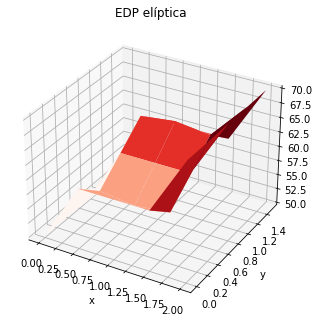

In [5]:
# Gráfica
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(xi, yj)
U = np.transpose(u) # ajuste de índices fila es x

figura = plt.figure()
ax = Axes3D(figura)
ax.plot_surface(X, Y, U, rstride=1, cstride=1, cmap=cm.Reds)

plt.title('EDP elíptica')
plt.xlabel('x')
plt.ylabel('y')
plt.show()